## Predict Product Return

In [26]:
#import files
!pip install wordcloud
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [9]:
file_path = 'product_return.csv'
df = pd.read_csv(file_path)

In [15]:
print("Available columns in your dataset:")
print(df.columns.tolist())

Available columns in your dataset:
['purchase_amount', 'review_score', 'days_to_delivery', 'returned']


In [17]:
print("\nAvailable features:")
print([col for col in df.columns if col != target_column])
feature_choices = input("Enter column names to use as features (comma separated): ").split(',')
features = [f.strip() for f in feature_choices if f.strip() in df.columns]

if not features:
    features = [col for col in df.columns if col != target_column][:3]  # Use first 3 non-target columns as default
    print(f"\nUsing default features: {features}")


Available features:
['purchase_amount', 'review_score', 'days_to_delivery']
Enter column names to use as features (comma separated): purchase_amount,review_score


In [18]:
print(f"\nUnique values in '{target_column}':")
print(df[target_column].value_counts())



Unique values in 'returned':
returned
yes    59
no     41
Name: count, dtype: int64


In [20]:
if df[target_column].nunique() == 2:  # If exactly 2 unique values
    df['target'] = (df[target_column] == df[target_column].value_counts().idxmax()[0]).astype(int)
else:
    # Let user specify which value means "returned"
    returned_value = input(f"Which value in '{target_column}' indicates a return? ")
    df['target'] = (df[target_column] == returned_value).astype(int)

# Handle missing values
df_clean = df[features + ['target']].dropna()

In [21]:
X = df_clean[features]
y = df_clean['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"\nModel Accuracy: {accuracy:.2%}")


Model Accuracy: 100.00%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


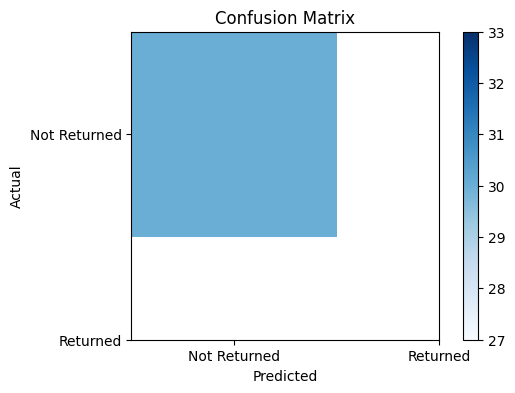

In [24]:
plt.figure(figsize=(6,4))
plt.imshow(confusion_matrix(y_test, predictions), cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0,1], ['Not Returned', 'Returned'])
plt.yticks([0,1], ['Not Returned', 'Returned'])
plt.show()


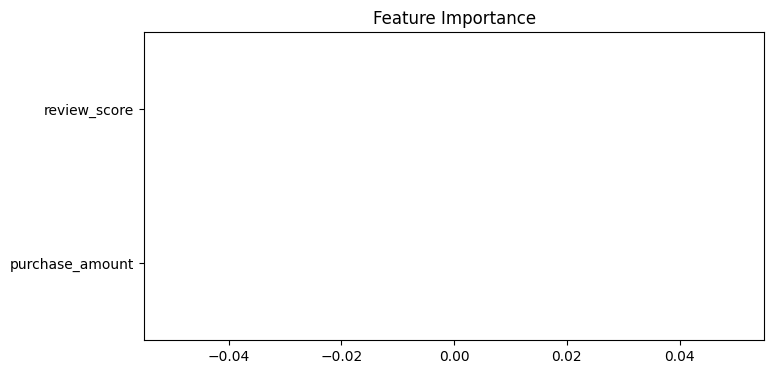

In [25]:
plt.figure(figsize=(8,4))
pd.Series(model.feature_importances_, index=features).sort_values().plot.barh()
plt.title('Feature Importance')
plt.show()